## 蒙特卡洛模拟

蒙特卡洛是一种通过采样来探索最优解的方法

### 简单应用：计算 $\pi$ 或者不规则图形面积：在所有空间内均匀采样，根据比例得出结果

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
from scipy.stats import poisson

In [2]:
n = 10000 # 模拟次数
a = np.random.rand(n) # 生成[0,1)的随机数
p = np.array([0.2, 0.05, 0.01, 0.06, 0.08, 0.1, 0.3, 0.05, 0.03, 0.12])
# 事件发生概率分布
cp = np.cumsum(p) # 对事件发生概率逐次累加
c = [np.sum(a <= cp[0])] # 事件发生的频数A1
for i in range(1, len(p)):
    c.append(np.sum((a > cp[i - 1]) & (a <= cp[i]))) # 计算事件A2~发生的频数A10
print(c)

[1995, 519, 117, 573, 816, 1004, 2963, 509, 309, 1195]


[ True  True  True ...  True  True  True]


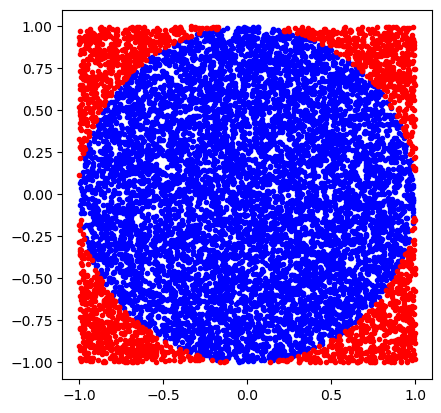

3.120 0.700%


In [3]:
N = 10000
x,y = np.random.uniform(-1,1,size=(2,N))
# 生成个随机点N
inside = (x**2+y**2)<=1
print(inside)
mpi = inside.sum()*4/N # 求的近似值pi
error = abs((mpi-np.pi)/np.pi)*100
# 计算理论值与模拟值的误差
outside = np.invert(inside)
plt.plot(x[inside],y[inside],'b.')
plt.plot(x[outside],y[outside],'r.')
plt.axis('square')
plt.show()
print('%.3f'% mpi,'%.3f%%'% error)

### 排队问题



某修理店只有一个修理工, 来修理的顾客到达时间间隔服从负指数分 布, 平均间隔时间 $10 \mathrm{~min}$; 对顾客的服务时间服从 [4,15]（单位： min） 上的均匀分布; 当到来的顾客较多时, 一部分顾客便需排队等待, 排 队按先到先服务的规则, 队长无限制; 服务完的顾客便离开修理店。 假定一个工作日为 $8 \mathrm{~h}$ 。
- 模拟一个工作日内完成服务的顾客人数及顾客平均等待时间。
- 模拟 1000 个工作日, 求出平均每日完成服务的顾客人数及每日顾 客的平均等待时间。

分析：
设：
1. 每个顾客到来时间差为$x_i$
2. 每次服务需要时间为$y_i$
3. 每个顾客到达时间为$c_i$
4. 每个顾客开始服务时间$b_i$
5. 每个顾客结束服务的时间为$e_i$
6. 总等待时间为$w$

那么我们有以下等式：
$$
\begin{aligned}
& \mathbf{c}_{\mathbf{i}}=\mathbf{c}_{\mathbf{i}-\mathbf{1}}+\mathbf{x}_{\mathbf{i}} \\
& \mathbf{e}_{\mathbf{i}}=\mathbf{b}_{\mathbf{i}}+\mathbf{y}_{\mathbf{i}} \\
& \mathbf{b}_{\mathbf{i}}=\max \left(\mathbf{c}_{\mathbf{i}}, \mathbf{e}_{\mathbf{i}-1}\right)\\
& \mathbf{w} := \mathbf{w} + \mathbf{b}_\mathbf{i} - \mathbf{c}_\mathbf{i}
\end{aligned}
$$

/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_82806/1221691212.py:4: RuntimeWarning: divide by zero encountered in log
  y = -10 * np.log(x)


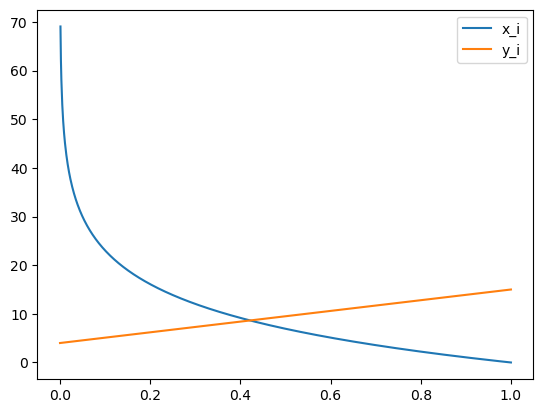

In [4]:
### plot the distribution of x_i
def plot_x():
    x = np.linspace(0, 1, 1000)
    y = -10 * np.log(x)
    plt.plot(x, y, label='x_i')
plot_x()
### plot the distribution of y_i
def plot_y():
    x = np.linspace(0, 1, 1000)
    y = 4 + 11 * x
    plt.plot(x, y, label='y_i')
plot_y()
plt.legend()
plt.show()

In [5]:
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt

Average number of customers:  50
Average waiting time:  27.843369741053536


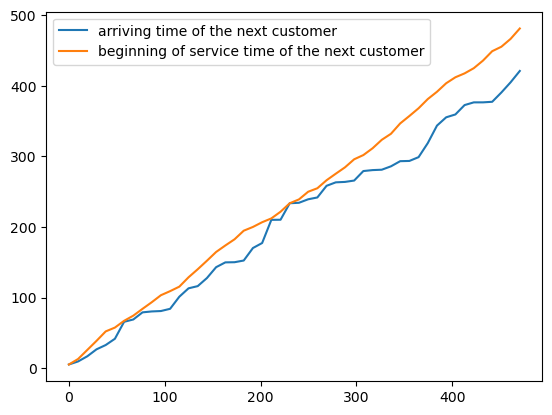

Average waiting time:  23.841640662532175
Average number of customers:  44.608


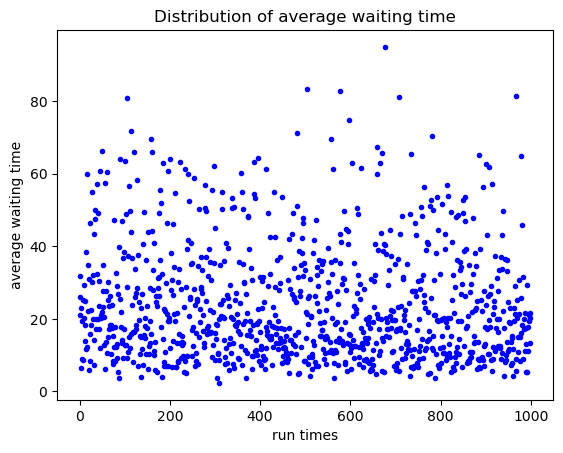

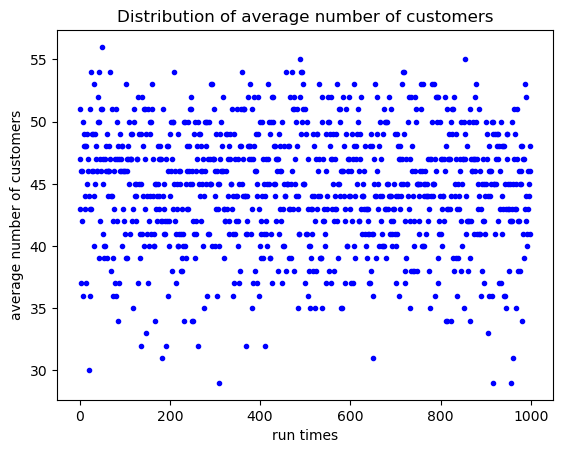

In [6]:
### Solve the queuing problem
w_list = []
num_customer = []
def queue():
    b_list = []
    ### step 1: initialize the parameters
    i = 1
    ### x_i is under negative exponential distribution with mean 10
    x_i = -10 * math.log(random.rand())
    ### y_i is a linear distribution between 4 and 15
    y_i = 4 + 11 * random.rand() ########################### not meet 15################
    ### c_1 is x_1
    c = [x_i]
    ### e_0 is 0
    e = [0]
    ### w is 0 at the beginning
    w = 0
    ### step 2: simulate the process
    ### the working time is 8 hours, which is 480 minutes
    b = x_i
    b_list.append(b)
    while b <= 480:
        ### the ending of service time of the current customer
        e.append(b + y_i)
        ### add to the total waiting time
        if( b - c[-1] > 0):
            w += b - c[-1]
        ### the arrival time of the next customer
        x_i = -10 * math.log(random.random())
        ### the service time of the next customer
        y_i = 4 + 11 * random.rand() ########################### not meet 15################
        ### the arriving time of the next customer
        c.append(c[-1] + x_i)
        ### the beginning of service time of the next customer
        b = max(c[-1], e[-1])
        b_list.append(b)
    w_list.append(w / len(c))
    num_customer.append(len(c))
    return c, b_list, w_list, num_customer


### plot the result
c, b_list, w_list, num_customer = queue()
time = np.arange(0, 480, 480/len(c))
print("Average number of customers: ", num_customer[0])
print("Average waiting time: ", w_list[0])
plt.plot(time, c, label='arriving time of the next customer')
plt.plot(time, b_list, label='beginning of service time of the next customer')
plt.legend()
plt.show()
### step 3: repeat the process for 1000 times
N = 1000
w_list = []
num_customer = []
for i in range(N):
    c, b_list, w_list, num_customer = queue()
print("Average waiting time: ", np.mean(w_list))
print("Average number of customers: ", np.mean(num_customer))
### plot the distribution of w
i = np.arange(0, N, 1).tolist()
plt.plot(i, w_list,'b.')
plt.title('Distribution of average waiting time')
plt.xlabel('run times')
plt.ylabel('average waiting time')
plt.show()
plt.plot(i, num_customer,'b.')
plt.title('Distribution of average number of customers')
plt.xlabel('run times')
plt.ylabel('average number of customers')
plt.show()